# K_nearest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df=pd.read_csv("Terrorism.csv")
df.head()

,FactID,dYear,dMonth,dDay,dDate,CountryID,CountryName,RegionID,RegionName,City,...,TargetTypeID,TargetType,WeaponTypeID,WeaponType,Kills,Wounds,Success,Suicide,PropertyDamage,GName
0,197000000001,1970,7,2,02/07/1970,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,...,14,Private Citizens & Property,13,Unknown,1.0,0.0,1,0,0,MANO-D
1,197000000002,1970,1,1,01/01/1970,130,Mexico,1,North America,Mexico city,...,7,Government (Diplomatic),13,Unknown,0.0,0.0,1,0,0,23rd of September Communist League
2,197001000001,1970,1,1,01/01/1970,160,Philippines,5,Southeast Asia,Unknown,...,10,Journalists & Media,13,Unknown,1.0,0.0,1,0,0,Unknown
3,197001000002,1970,1,1,01/01/1970,78,Greece,8,Western Europe,Athens,...,7,Government (Diplomatic),6,Explosives,-1.0,-1.0,1,0,1,Unknown
4,197001000003,1970,1,1,01/01/1970,101,Japan,4,East Asia,Fukouka,...,7,Government (Diplomatic),8,Incendiary,-1.0,-1.0,1,0,1,Unknown


In [ ]:
# Loại bỏ dữ liệu rỗng
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
df['Success'] = df['Success'].astype(int)

# Dropping non-relevant columns for simplicity
df_reduced = df[['CountryID', 'AttackTypeID','WeaponTypeID', 'TargetTypeID', 'Success']]

# Tách thuộc tính quyết định ra cột riêng
X = df_reduced.drop('Success', axis=1)
y = df_reduced['Success']

In [ ]:
# Tách dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Thực hiện thuật toán Knn
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import classification_report
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
start_knn=time.time()
knn_scores=[]

for i in range(1,12):
    knc=KNeighborsClassifier(i)
    knn_pred=knc.fit(X_train,y_train).predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test,knn_pred))
    max_knn_score=max (knn_scores)

knn_scores_ind=[i for i, v in enumerate(knn_scores) if v == max_knn_score]
end_knn=time.time()
times_knn=timedelta(seconds=round(end_knn-start_knn,4)).total_seconds()
print("heighest Accuracy Score : {}% with k = {}".format(max_knn_score*100,list(map(lambda x:x+1,knn_scores_ind))))
print("Time", times_knn)
knn_score=round(max_knn_score*100,2)
accuracies_max_knn=knn_score
print("Accuracy",accuracies_max_knn,"%")
print("Report",metrics.classification_report(y_test,knn_pred))

heighest Accuracy Score : 90.52367698291276% with k = [11]
Time 44.8725
Accuracy 90.52 %
Report               precision    recall  f1-score   support

           0       0.71      0.25      0.37      6024
           1       0.91      0.99      0.95     48227

    accuracy                           0.91     54251
   macro avg       0.81      0.62      0.66     54251
weighted avg       0.89      0.91      0.88     54251



Text(0.5, 1.0, 'K-Nearest Neighbors Accuaracy Score : 90.52%')

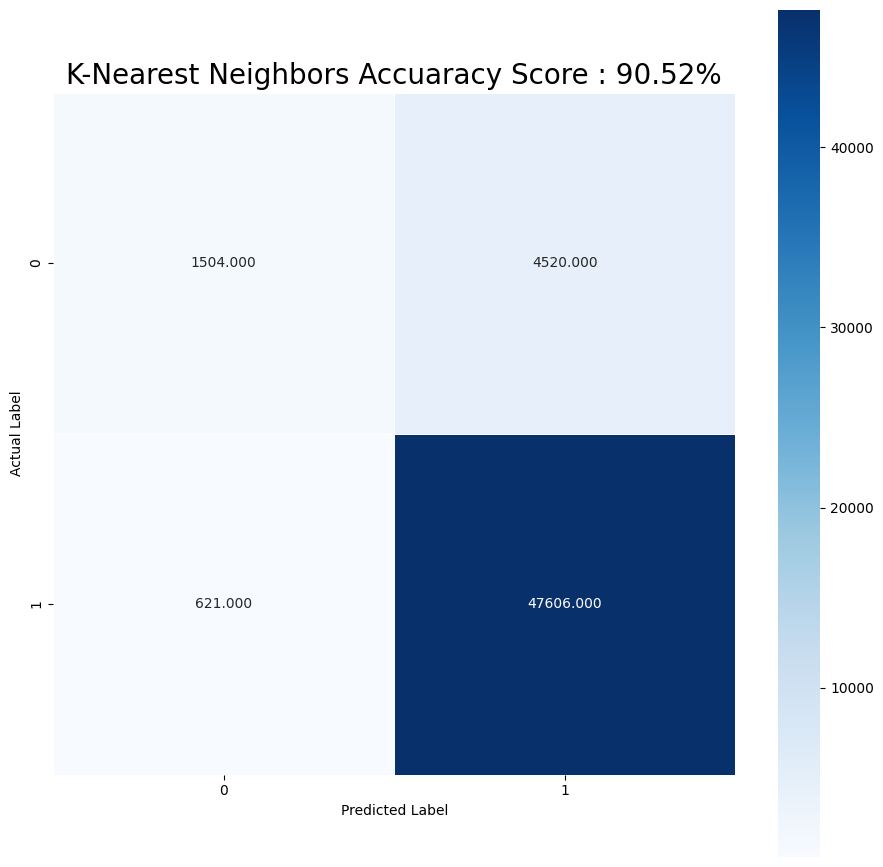

In [ ]:
knn_cm=metrics.confusion_matrix(y_test,knn_pred)
plt.figure(figsize=(11,11))
ax= sns.heatmap(knn_cm, annot=True, fmt=".3f",linewidths=.5,square=True,cmap='Blues')
ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
title="K-Nearest Neighbors Accuaracy Score : {0}%".format(knn_score)
plt.title(title,size=20)